In [1]:
# import dependencies
import json
import requests
import re, string, timeit
import time
import pandas as pd
from datetime import datetime as dt
import sys
sys.path.append('./config')
from password import client_id, client_secret

In [2]:
# read list of suburbs
suburbs_df=pd.read_csv('./source/suburbs.csv')

In [3]:
postcode=suburbs_df.drop_duplicates('Postcode')
postcode=list(postcode['Postcode'])
len(postcode)

259

In [4]:
listingState=[]
listingFeature=[]
listingPropType=[]
listingBath=[]
listingBed=[]
listingCar=[]
listingSub=[]
listingPCode=[]
listingAdd=[]
listingLat=[]
listingLong=[]
listingFPlan=[]
listingSoldMethod=[]
listingSoldDate=[]
listingSoldPrice=[]

In [5]:
# POST request for token
response = requests.post('https://auth.domain.com.au/v1/connect/token', data = {'client_id':client_id,"client_secret":client_secret,"grant_type":"client_credentials","scope":"api_listings_read","Content-Type":"text/json"})
token=response.json()
access_token=token["access_token"]
auth = {"Authorization":"Bearer "+access_token}

In [6]:
def getListing(postcode,pageNum):
    print(f'postcode={postcode},page number={pageNum}')
    time.sleep(1)
    url = "https://api.domain.com.au/v1/listings/residential/_search" # Set destination URL here
    post_fields ={
        "listingType":"Sold",
        "propertyTypes":["ApartmentUnitFlat","House","NewApartments","Townhouse"],
        "locations":[
            {
                "state":"VIC",
                "postCode":postcode,
                "includeSurroundingSuburbs":False
            }
        ],
        "excludePriceWithheld": True,
        "sort": {
        "sortKey": "SoldDate",
        "direction": "Descending",
        "proximityTo": {
            "lat": 0,
            "lon": 0
            }
        },
        "pageSize": 200,
        "pageNumber":pageNum
    }
    try:
        request = requests.post(url,headers=auth,json=post_fields)
        l=request.json()
        for listing in l:
            try:
                listingState.append(listing["listing"]["propertyDetails"]["state"])
            except:
                listingState.append("NA")
            try:
                listingFeature.append(listing["listing"]["propertyDetails"]["features"])
            except:
                listingFeature.append("NA")
            try:
                listingPropType.append(listing["listing"]["propertyDetails"]["propertyType"])
            except:
                listingPropType.append("NA")
            try:
                listingBath.append(listing["listing"]["propertyDetails"]["bathrooms"])
            except:
                listingBath.append("NA")
            try:
                listingBed.append(listing["listing"]["propertyDetails"]["bedrooms"])
            except:
                listingBed.append("NA")
            try:
                listingCar.append(listing["listing"]["propertyDetails"]["carspaces"])
            except:
                listingCar.append("NA")
            try:
                listingSub.append(listing["listing"]["propertyDetails"]["suburb"])
            except:
                listingSub.append("NA")
            try:
                listingPCode.append(listing["listing"]["propertyDetails"]["postcode"])
            except:
                listingPCode.append("NA")
            try:
                listingAdd.append(listing["listing"]["propertyDetails"]["displayableAddress"])
            except:
                listingAdd.append("NA")
            try:
                listingLat.append(listing["listing"]["propertyDetails"]["latitude"])
            except:
                listingLat.append("NA")
            try:
                listingLong.append(listing["listing"]["propertyDetails"]["longitude"])
            except:
                listingLong.append("NA")
            try:
                listingFPlan.append(listing["listing"]["hasFloorplan"])
            except:
                listingFPlan.append("NA")
            try:
                listingSoldMethod.append(listing["listing"]["soldData"]["saleMethod"])
            except:
                listingSoldMethod.append("NA")
            try:
                listingSoldDate.append(listing["listing"]["soldData"]["soldDate"])
            except:
                listingSoldDate.append("NA")
            try:
                listingSoldPrice.append(listing["listing"]["soldData"]["soldPrice"])
            except:
                listingSoldPrice.append("NA")
        print(l[len(l)-1]["listing"]["soldData"]["soldDate"])
        if dt.strptime(l[len(l)-1]["listing"]["soldData"]["soldDate"],'%Y-%m-%d')>=dt.strptime('2020-01-01','%Y-%m-%d'):
            getListing(postcode,pageNum+1)
    except:
        pass

In [7]:
# Start your loop
for j in postcode:
    getListing(j,1)

postcode=3000,page number=1
2020-02-03
postcode=3000,page number=2
2019-09-20
postcode=3002,page number=1
2017-05-30
postcode=3003,page number=1
2017-10-18
postcode=3004,page number=1
2019-05-10
postcode=3005,page number=1
postcode=3006,page number=1
2020-01-10
postcode=3006,page number=2
2019-06-06
postcode=3008,page number=1
2019-10-10
postcode=3010,page number=1
postcode=3011,page number=1
2019-11-12
postcode=3012,page number=1
2020-01-28
postcode=3012,page number=2
2019-08-09
postcode=3013,page number=1
2019-08-24
postcode=3015,page number=1
2019-10-19
postcode=3016,page number=1
2019-07-20
postcode=3018,page number=1
2019-10-04
postcode=3019,page number=1
2018-05-07
postcode=3020,page number=1
2020-01-11
postcode=3020,page number=2
2019-09-08
postcode=3021,page number=1
2020-02-25
postcode=3021,page number=2
2019-09-18
postcode=3022,page number=1
2016-09-23
postcode=3023,page number=1
2020-04-14
postcode=3023,page number=2
2019-12-11
postcode=3024,page number=1
2020-01-24
postcode

2019-10-04
postcode=3211,page number=1
2009-03-10
postcode=3335,page number=1
2017-06-05
postcode=3337,page number=1
2020-04-07
postcode=3337,page number=2
2019-12-09
postcode=3338,page number=1
2020-03-17
postcode=3338,page number=2
2019-10-15
postcode=3340,page number=1
2020-02-14
postcode=3340,page number=2
2019-08-12
postcode=3341,page number=1
2007-02-06
postcode=3427,page number=1
2015-06-25
postcode=3428,page number=1
2009-05-11
postcode=3429,page number=1
2020-03-26
postcode=3429,page number=2
2019-11-14
postcode=3430,page number=1
2014-01-22
postcode=3431,page number=1
2014-10-23
postcode=3432,page number=1
2009-12-01
postcode=3434,page number=1
2017-10-11
postcode=3435,page number=1
2014-01-24
postcode=3437,page number=1
2019-04-22
postcode=3438,page number=1
2014-09-22
postcode=3440,page number=1
2010-07-10
postcode=3441,page number=1
2009-01-31
postcode=3442,page number=1
2018-04-17
postcode=3658,page number=1
2017-07-28
postcode=3750,page number=1
2020-02-10
postcode=3750,

In [8]:
listing_df=pd.DataFrame(
    {
        "State":listingState,
        "Feature":listingFeature,
        "Type":listingPropType,
        "Bath":listingBath,
        "Bed":listingBed,
        "Car":listingCar,
        "Suburb":listingSub,
        "Postcode":listingPCode,
        "Address":listingAdd,
        "Latitude":listingLat,
        "Longitude":listingLong,
        "Floorplan":listingFPlan,
        "SoldMethod":listingSoldMethod,
        "SoldDate":listingSoldDate,
        "SoldPrice":listingSoldPrice
    }
)

In [12]:
listing_df["SoldDate"]=pd.to_datetime(listing_df["SoldDate"],infer_datetime_format=True)  
listing_df=listing_df[listing_df["SoldDate"]>=dt.strptime('2020-01-01','%Y-%m-%d')]
listing_df["SoldDate"].describe()

<ipython-input-12-f44a597611b0>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listing_df["SoldDate"].describe()


count                   25927
unique                    289
top       2020-02-29 00:00:00
freq                      699
first     2020-01-01 00:00:00
last      2020-10-15 00:00:00
Name: SoldDate, dtype: object

In [13]:
listing_df.to_csv("./source/latest_listings.csv",index=False)

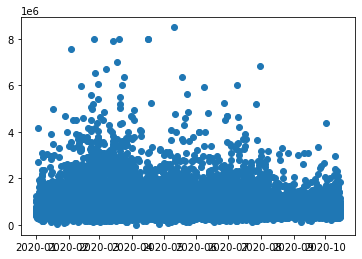

In [14]:
import matplotlib.pyplot as plt
plt.scatter(listing_df["SoldDate"],listing_df["SoldPrice"])

In [16]:
a=pd.DataFrame(listing_df.groupby("SoldDate")["SoldPrice"].mean())
a=a.reset_index(drop=False)

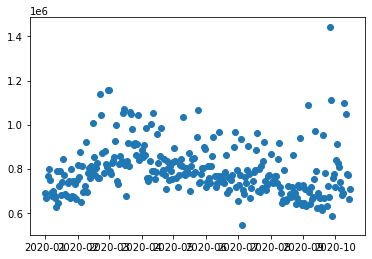

In [17]:
plt.scatter(a["SoldDate"],a["SoldPrice"])